# 데이터 준비

In [78]:
import numpy as np
import keras

## 데이터 읽기

In [79]:
import pandas as pd

df = pd.read_csv('./DSA_features.csv')

df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


## EDA 실행

In [80]:
df.shape

(9120, 272)

### 2-1) 결측치 확인, 제거

In [81]:
# 결측치 확인
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [82]:
df.isnull().values.any()

False

### 2-2) 레이블 확인

Text(0, 0.5, 'Count')

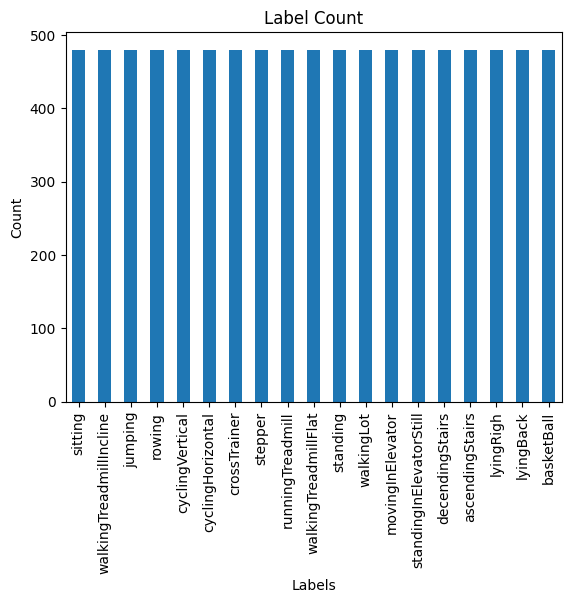

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [84]:
# 레이블 갯수 확인 (숫자)
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [85]:
# DSA데이터에서 LyingBack, LyingRigh(normal) / basketBall(abnormal)만 남김

filtered_df = df[df['activity'].isin(['lyingBack', 'lyingRigh', 'basketBall'])]

filtered_df.shape

(1440, 272)

activity를 레이블 인코딩해줌

In [86]:
# filtered_df에서 activity 값을 수정
for index, row in filtered_df.iterrows():
    if row['activity'] == 'lyingBack' or row['activity'] == 'lyingRigh':
        filtered_df.at[index, 'activity'] = 0  # Normal
    else:
        filtered_df.at[index, 'activity'] = 1  # Abnormal

In [87]:
LABELS = ["Normal", "Abnormal"]

C:\Users\황주신\AppData\Local\Temp\ipykernel_3644\2237617807.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(filtered_df['activity'], sort = True)


Text(0, 0.5, 'Frequency')

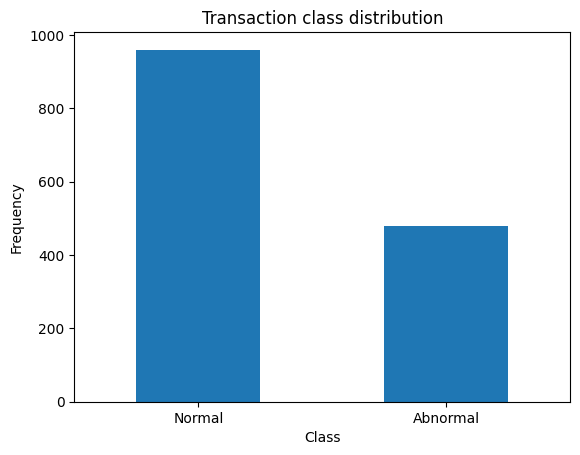

In [88]:
count_classes = pd.value_counts(filtered_df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [89]:
# filtered_df를 기준으로 abnormal과 normal 데이터프레임 생성
abnormal = filtered_df[filtered_df['activity'] == 1]
normal = filtered_df[filtered_df['activity'] == 0]

# abnormal 데이터프레임의 shape 확인
print(abnormal.shape)


(480, 272)


In [90]:
normal.shape

(960, 272)

### 2-3) 데이터 및 레이블 인코딩

people를 삭제

In [91]:
# 'people' 컬럼을 삭제
abnormal = abnormal.drop('people', axis = 1)
normal = normal.drop('people', axis = 1)

## Train데이터, Test데이터 나누기

In [92]:
RANDOM_SEED = 32

# split train, test
from sklearn.model_selection import train_test_split

normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = RANDOM_SEED)

각각 나눠진 normal_test에 abnormal을 병합한다. 이는 Test data로 사용된다.

In [93]:
Test_data = pd.concat([normal_test, abnormal], ignore_index=True)

shuffled_index = np.random.permutation(Test_data.index)
Test_data = Test_data.iloc[shuffled_index].reset_index(drop=True)

Test_data

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,-4.513428,-4.26240,-4.6652,0.005976,0.077305,0.761349,1.185826,1.32870,0.94852,0.003505,...,4.017579e-07,0.000634,-0.020377,-0.124680,-0.12291,-0.126720,4.510580e-07,0.000672,-0.030964,0
1,8.674290,13.67200,1.3643,3.416000,1.848242,-0.387965,-1.438481,1.65310,-7.93990,2.280180,...,3.341503e-02,0.182798,0.643547,0.348049,0.56693,0.045857,1.526116e-02,0.123536,0.315245,1
2,-0.602625,-0.56331,-0.6680,0.000412,0.020289,-0.637912,-9.748717,-9.65860,-9.82860,0.000660,...,5.477761e-07,0.000740,-0.018661,-0.614780,-0.61316,-0.616900,5.789193e-07,0.000761,-0.163001,0
3,9.459139,26.88300,-2.2829,17.538646,4.187917,0.566585,-0.319371,8.46190,-7.33950,4.731382,...,1.287923e-01,0.358876,-0.144833,0.063622,0.74809,-0.478560,1.287195e-01,0.358775,0.081245,1
4,-2.959565,-2.87310,-3.0742,0.001085,0.032936,-0.342188,1.799966,1.85330,1.71880,0.000443,...,7.164418e-07,0.000846,0.078073,-0.323783,-0.32196,-0.325440,6.151520e-07,0.000784,0.124338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,7.337897,11.71100,5.4501,1.424584,1.193559,1.608997,-1.848867,-0.43177,-5.50940,0.721323,...,2.160959e-03,0.046486,-0.480255,0.227383,0.35999,-0.526440,3.140261e-02,0.177208,-2.780643,1
668,9.755648,14.44800,6.1911,1.871739,1.368115,0.687152,0.062824,4.41900,-3.77590,2.756446,...,5.480762e-02,0.234110,-0.265781,0.361061,0.47581,0.250830,4.423029e-03,0.066506,0.183944,1
669,9.542010,33.55000,-3.4597,34.940241,5.911027,0.692621,-0.503390,8.56480,-11.48700,11.310598,...,7.974889e-02,0.282398,-0.646295,0.293046,0.71816,-0.490690,1.835318e-01,0.428406,-0.675939,1
670,9.613950,13.79700,6.8065,2.116067,1.454671,0.805034,-0.098779,3.54510,-3.36580,2.178902,...,3.382228e-02,0.183908,-0.648299,-0.019948,0.52240,-0.379100,8.834161e-02,0.297223,0.721634,1


Test_data의 X와 Y값을 나눠준다.

In [94]:
Test_X = Test_data.drop(['activity'], axis = 1)
Test_Y = Test_data['activity']

학습시에는 activity값이 필요가 없기 때문에 activity 열을 drop한다.

In [95]:
normal_train.shape

(768, 271)

In [96]:
normal_train = normal_train.drop(['activity'], axis = 1)

## Train, Valid 데이터 나누기

In [97]:
Train_data, Valid_data = train_test_split(normal_train, test_size = 0.2, random_state= RANDOM_SEED)

In [98]:
Train_data = np.array(Train_data)
Test_data = np.array(Test_data)

## 데이터 스케일링

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Train_data_scaled = scaler.fit_transform(Train_data)
Valid_data_scaled = scaler.fit_transform(Valid_data)
Test_X_scaled = scaler.fit_transform(Test_X)

# 1. 대칭 구조 AE Model 정의하기

In [100]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델

input_dim = Train_data_scaled.shape[1]
encoding_dim = 64  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))

# 인코더
encoded = Dense(128, activation = 'relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# 디코더
decoded = Dense(128, activation = 'relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [101]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = autoencoder.fit(Train_data_scaled, Train_data_scaled, epochs = 500, batch_size = 32, shuffle = True, validation_data= (Valid_data_scaled,Valid_data_scaled), callbacks = callbacks)

autoencoder.summary()

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2552 - val_loss: 1.0003
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9410 - val_loss: 0.8949
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9562 - val_loss: 0.8514
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0528 - val_loss: 0.8270
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0513 - val_loss: 0.8164
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6290 - val_loss: 0.8111
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8181 - val_loss: 0.8077
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1841 - val_loss: 0.8056
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8663 - val_loss: 0.8033
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9940 - val_loss: 0.8008
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6467 - val_loss: 0.7992
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        34,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 270)            │        34,830 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,284 (1008.93 KB)

 Trainable params: 86,094 (336.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 172,190 (672.62 KB)

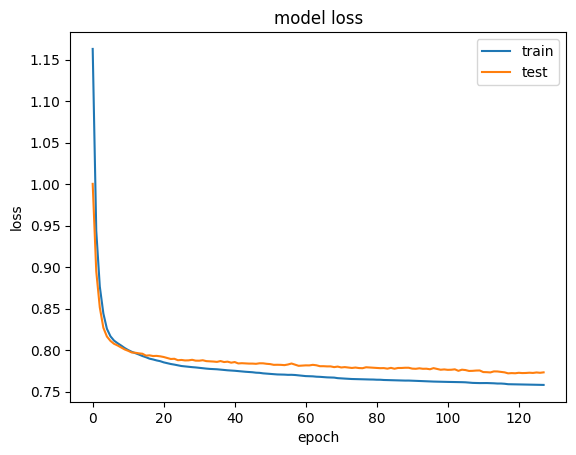

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [103]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(Test_X)
mse = np.mean(np.power(Test_X - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Test_Y})

error_df = error_df.reset_index(drop = True)
error_df

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
0,4.697108,0
1,89.922065,1
2,5.014683,0
3,187.465594,1
4,4.831511,0
...,...,...
667,13.445063,1
668,30.230304,1
669,260.737451,1
670,64.449929,1


In [104]:
error_df.describe()

,reconstruction_error
count,672.000000
mean,118.421594
std,123.049304
min,4.674089
25%,5.173624
50%,88.849502
75%,178.701599
max,972.051580


In [105]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()


,reconstruction_error
count,192.000000
mean,4.963847
std,0.188938
min,4.674089
25%,4.817043
50%,4.931633
75%,5.071517
max,5.726544


In [106]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()


,reconstruction_error
count,480.000000
mean,163.804693
std,118.264425
min,7.982829
25%,78.423447
50%,138.824794
75%,216.063249
max,972.051580


abnormal의 최소값이 normal의 최댓값보다 큰 것을 알 수 있다.

그래프로 확인해보자.

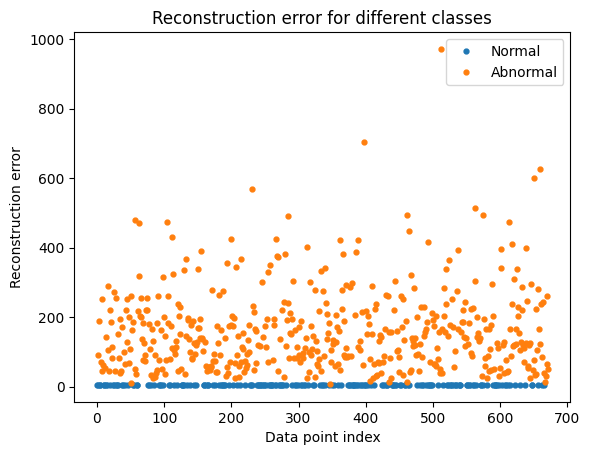

In [107]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Abnormal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

threshold값을 6으로 설정한다.

In [108]:
# threshold 값을 조정하여 최선의 정확도를 얻음

threshold = 6

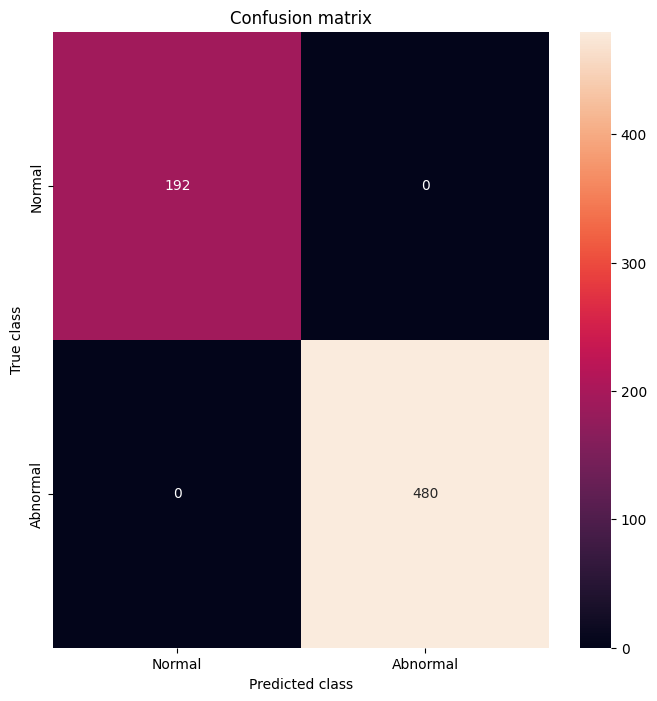

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       480

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



In [109]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
y_pred = pd.Series(y_pred)

error_df['true_class'] = error_df['true_class'].astype(int)

conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

# 2. 비대칭 구조 AE Model 정의하기

In [110]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델

input_dim = Train_data_scaled.shape[1]
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))

# 인코더
encoded = Dense(128, activation = 'relu')(input_layer)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# 디코더
decoded = Dense(128, activation = 'relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder_asymmetric = Model(inputs=input_layer, outputs=decoded)
autoencoder_asymmetric.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [111]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = autoencoder_asymmetric.fit(Train_data_scaled, Train_data_scaled, epochs = 500, batch_size = 32, shuffle = True, validation_data= (Valid_data_scaled,Valid_data_scaled), callbacks = callbacks)

autoencoder_asymmetric.summary()

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.9687 - val_loss: 1.0126
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9274 - val_loss: 0.9139
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8831 - val_loss: 0.8830
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7372 - val_loss: 0.8536
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8869 - val_loss: 0.8295
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7875 - val_loss: 0.8196
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7769 - val_loss: 0.8145
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7173 - val_loss: 0.8113
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8990 - val_loss: 0.8075
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8252 - val_loss: 0.8051
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7596 - val_loss: 0.8037
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        34,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 270)            │        34,830 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,236 (985.30 KB)

 Trainable params: 84,078 (328.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,158 (656.87 KB)

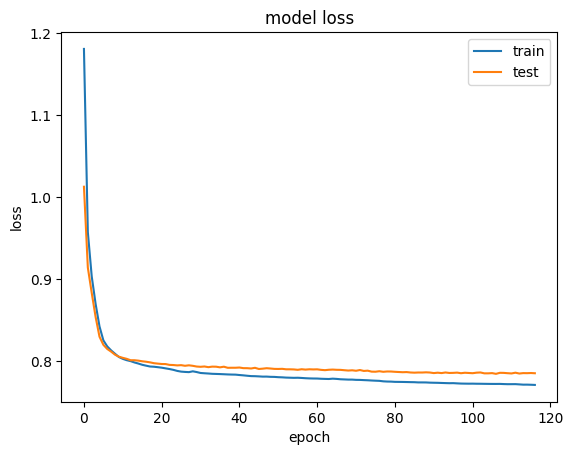

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [113]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder_asymmetric.predict(Test_X)
mse = np.mean(np.power(Test_X - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Test_Y})

error_df = error_df.reset_index(drop = True)
error_df

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,reconstruction_error,true_class
0,4.710436,0
1,89.547222,1
2,5.031387,0
3,185.583454,1
4,4.803162,0
...,...,...
667,13.365897,1
668,30.082246,1
669,259.541036,1
670,64.100323,1


In [114]:
error_df.describe()

,reconstruction_error
count,672.000000
mean,117.864441
std,122.572295
min,4.676814
25%,5.199885
50%,88.189081
75%,177.844406
max,968.111873


In [115]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()


,reconstruction_error
count,192.000000
mean,4.966169
std,0.191974
min,4.676814
25%,4.792583
50%,4.939090
75%,5.075789
max,5.688986


In [116]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()


,reconstruction_error
count,480.000000
mean,163.023749
std,117.870324
min,7.907339
25%,77.749807
50%,137.928090
75%,214.650287
max,968.111873


abnormal의 최소값이 normal의 최댓값보다 큰 것을 알 수 있다.

그래프로 확인해보자.

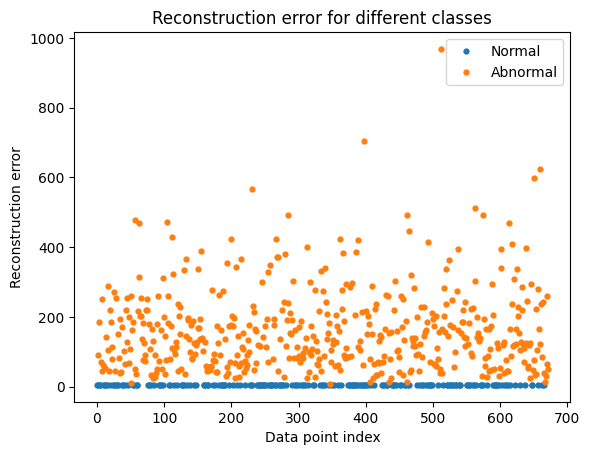

In [117]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Abnormal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

threshold값을 6으로 설정한다.

In [118]:
# threshold 값을 조정하여 최선의 정확도를 얻음

threshold = 6

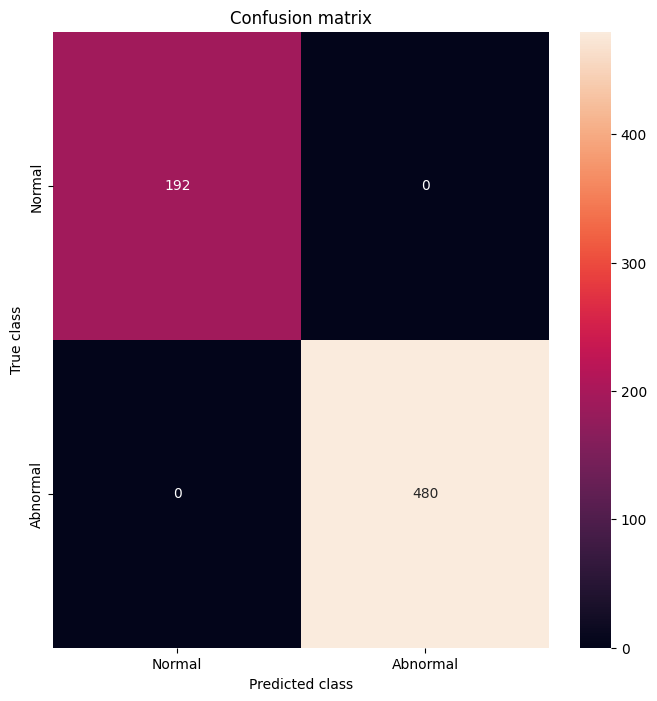

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       480

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



In [119]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
y_pred = pd.Series(y_pred)

error_df['true_class'] = error_df['true_class'].astype(int)

conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

# 3. DAE Model 정의하기

## 데이터 노이징

In [120]:
# Train_data에 Noise를 추가해준다.

noise_factor = 0.5

Noise_data = Train_data + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = Train_data.shape)

In [121]:
Noise_data = np.array(Noise_data)

Noise_data_scaled = scaler.fit_transform(Noise_data)

대칭구조 AE Model로 먼저 실험을 진행한다.

In [122]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = autoencoder.fit(Noise_data_scaled, Train_data_scaled, epochs = 500, batch_size = 32, shuffle = True, validation_data= (Valid_data_scaled,Valid_data_scaled), callbacks = callbacks)

autoencoder.summary()

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7200 - val_loss: 0.7889
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7349 - val_loss: 0.7831
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7674 - val_loss: 0.7829
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8591 - val_loss: 0.7777
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6350 - val_loss: 0.7791
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7062 - val_loss: 0.7772
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5647 - val_loss: 0.7724
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8205 - val_loss: 0.7717
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9814 - val_loss: 0.7718
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7773 - val_loss: 0.7699
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6963 - val_loss: 0.7707
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        34,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 270)            │        34,830 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,284 (1008.93 KB)

 Trainable params: 86,094 (336.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 172,190 (672.62 KB)

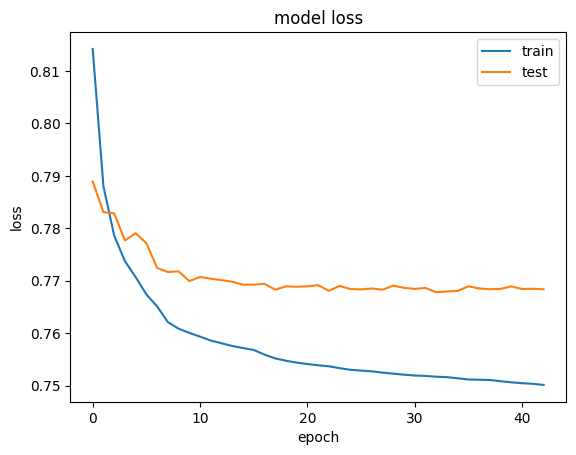

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [124]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(Test_X)
mse = np.mean(np.power(Test_X - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Test_Y})

error_df = error_df.reset_index(drop = True)
error_df

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,reconstruction_error,true_class
0,4.695750,0
1,89.764079,1
2,4.883808,0
3,185.783801,1
4,4.793588,0
...,...,...
667,13.104563,1
668,30.133958,1
669,260.010776,1
670,64.292795,1


In [125]:
error_df.describe()

,reconstruction_error
count,672.000000
mean,118.125705
std,122.805651
min,4.664065
25%,5.136242
50%,88.577847
75%,178.369176
max,970.838798


In [126]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()


,reconstruction_error
count,192.000000
mean,4.933563
std,0.185888
min,4.664065
25%,4.792472
50%,4.887153
75%,5.054471
max,5.625890


In [127]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()


,reconstruction_error
count,480.000000
mean,163.402561
std,118.052284
min,8.056420
25%,78.180923
50%,138.317220
75%,215.048873
max,970.838798


abnormal의 최소값이 normal의 최댓값보다 큰 것을 알 수 있다.

그래프로 확인해보자.

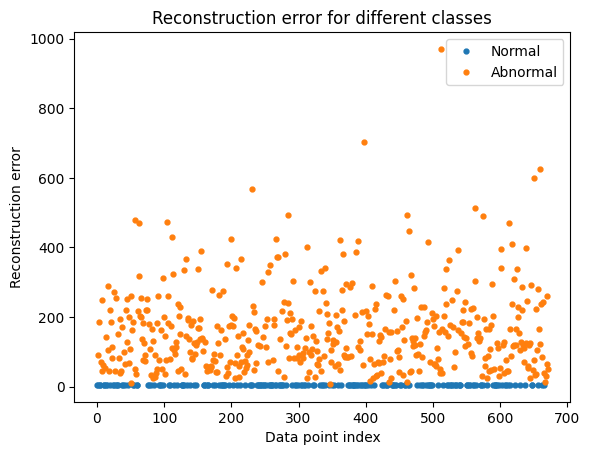

In [128]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Abnormal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

threshold값을 6으로 설정한다.

In [129]:
# threshold 값을 조정하여 최선의 정확도를 얻음

threshold = 6

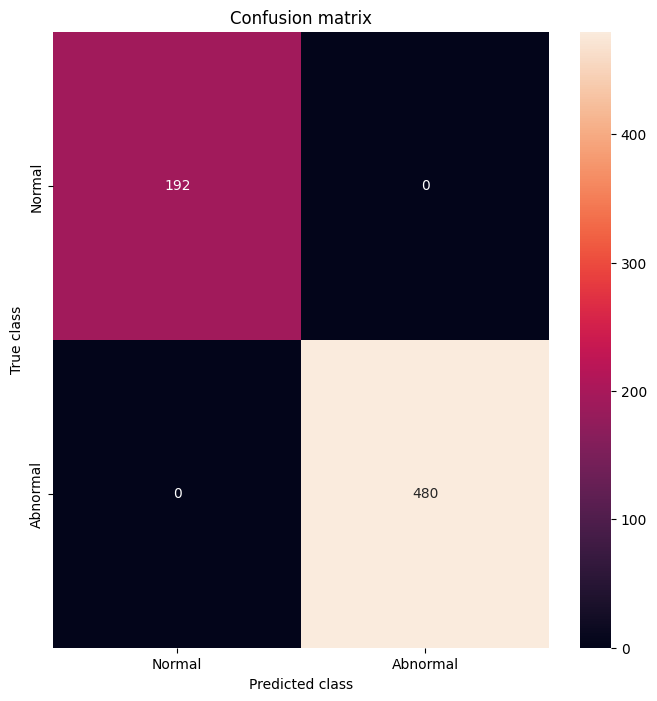

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       480

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



In [130]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
y_pred = pd.Series(y_pred)

error_df['true_class'] = error_df['true_class'].astype(int)

conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

AAE 모델로도 실험을 진행해본다.

In [131]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = autoencoder_asymmetric.fit(Noise_data_scaled, Train_data_scaled, epochs = 500, batch_size = 32, shuffle = True, validation_data= (Valid_data_scaled,Valid_data_scaled), callbacks = callbacks)

autoencoder_asymmetric.summary()

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7236 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7280 - val_loss: 0.7992
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5451 - val_loss: 0.7935
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8051 - val_loss: 0.7897
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6886 - val_loss: 0.7878
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8976 - val_loss: 0.7881
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8500 - val_loss: 0.7859
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8273 - val_loss: 0.7870
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8062 - val_loss: 0.7850
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7831 - val_loss: 0.7860
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8153 - val_loss: 0.7850
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8689 - val_loss: 0.7851
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6257 - val_l

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        34,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 270)            │        34,830 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,236 (985.30 KB)

 Trainable params: 84,078 (328.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,158 (656.87 KB)

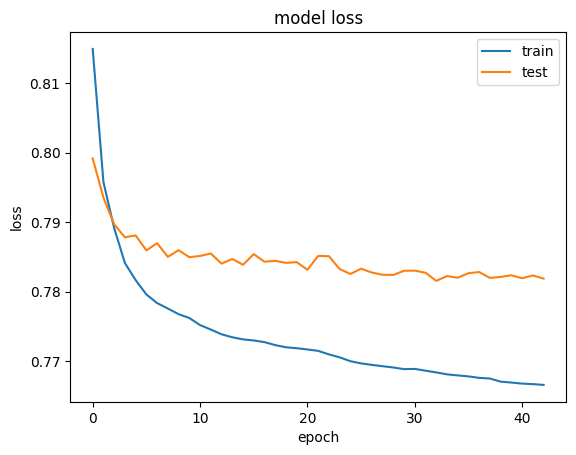

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [133]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder_asymmetric.predict(Test_X)
mse = np.mean(np.power(Test_X - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Test_Y})

error_df = error_df.reset_index(drop = True)
error_df

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,reconstruction_error,true_class
0,4.711786,0
1,89.509607,1
2,5.023001,0
3,186.160974,1
4,4.742121,0
...,...,...
667,13.280445,1
668,30.212342,1
669,259.207094,1
670,64.394418,1


In [134]:
error_df.describe()

,reconstruction_error
count,672.000000
mean,117.793906
std,122.490602
min,4.683330
25%,5.165796
50%,88.110655
75%,177.745056
max,967.630962


In [135]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()


,reconstruction_error
count,192.000000
mean,4.960252
std,0.190791
min,4.683330
25%,4.802850
50%,4.948760
75%,5.069246
max,5.778171


In [136]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()


,reconstruction_error
count,480.000000
mean,162.927368
std,117.786054
min,7.885834
25%,77.754828
50%,137.680357
75%,214.398108
max,967.630962


abnormal의 최소값이 normal의 최댓값보다 큰 것을 알 수 있다.

그래프로 확인해보자.

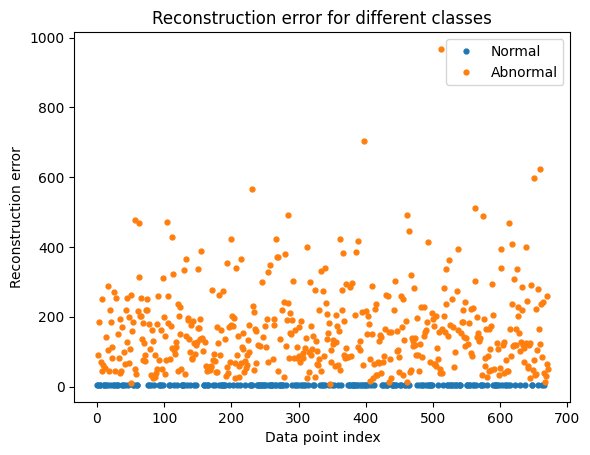

In [137]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Abnormal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

threshold값을 6으로 설정한다.

In [138]:
# threshold 값을 조정하여 최선의 정확도를 얻음

threshold = 6

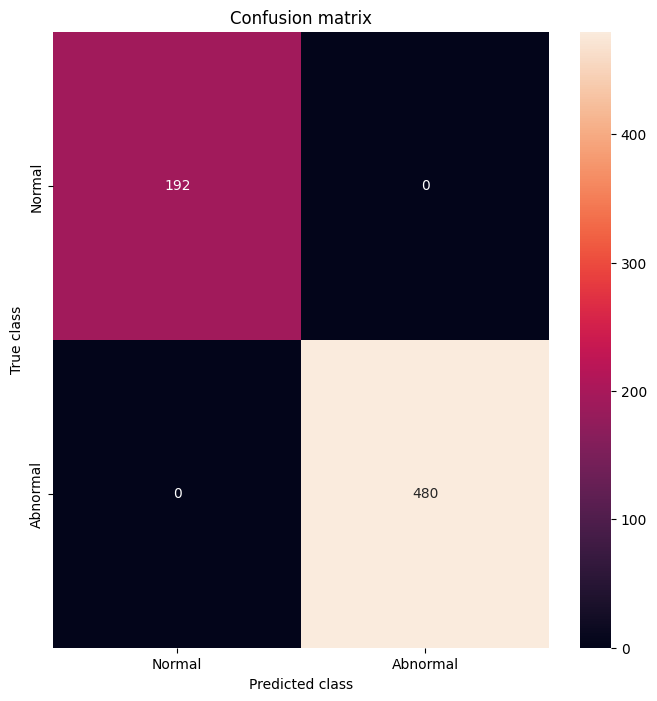

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       480

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



In [139]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
y_pred = pd.Series(y_pred)

error_df['true_class'] = error_df['true_class'].astype(int)

conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

# 결론

Noise를 추가하지 않았을 때 / 추가했을 때,
대칭구조일 때 / 대칭구조가 아닐 때 모두 100%의 결과를 얻어낼 수 있었다.

하지만, 모두가 이런 결과를 얻어낼 수 있는 모델이라면, 모델마다의 장단점과 특성을 이해하기 어려운 것 같다.